In [1]:

import matplotlib.pyplot as plt 
import numpy as np
from scipy.io import wavfile
from numpy.fft import fft, ifft
import scipy.signal as sig


external dependencies:
* ./AmAud1.py
* ./audiolibrary.json

# definition of the Signal Processor object
### the class definition is stored in a separate file so that it will be shared among multiple notebooks

In [2]:
from AmAud1 import AmAud1

# definition of the samples

11 samples taken from two separate online archives - one for training purposes and one for testing
* https://theremin.music.uiowa.edu/MIS-Pitches-2012/ - for training (6 samples)
* https://freesound.org - for testing (5 samples)

In [3]:
import json
with open('audiolibrary.json') as audiolibrary_file:
    library = json.load(audiolibrary_file)
    
print('library loaded with',len(library),'items')

library loaded with 18 items


In [4]:
def check_uniqueness_of_library_field(library,field):
    labels = [ dd[field] for dd in library]
    print(len(labels),field)
    return len(labels) == len(set(labels))

In [5]:
assert check_uniqueness_of_library_field(library,'label')
assert check_uniqueness_of_library_field(library,'wav')

18 label
18 wav


# ETL

## loading the audio wav files of the library

In [6]:
def do_dataexp_samples(library):
    #hyperparams
    objects = []
    for ddi in range(len(library)):
        dd=library[ddi]
        aa = AmAud1(dd['label'],dd)
        aa.load_wav_file(dd['wav'])
        print(aa)
        objects.append(aa)
    return objects

In [7]:
objects = do_dataexp_samples(library)
print('loaded',len(objects),'samples')

name: M:/DATALAKE/AUDIO/theremin_music_uiowa_edu/aiff2wav-via-audacity/Bassoon.ff.A3.stereo.wav
freq 44100 snd class <class 'numpy.ndarray'> ndim 2 shape (89670, 2)
channel 0 min -5216 max 5778
channel 1 min -5222 max 5772
len(pcm0) 89670 -1
['time minmax [ms]', 0.0, 2033.3106575963718]
LABEL=Bassoon1a
len(pcm)=89670 sps=44100 pcm_win=[0,89670] pcm_winsz=89670 isScaled_pcm=False
pcm_dtype=<class 'numpy.int16'> pcm_min=-5216 pcm_max=5778
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
name: M:/DATALAKE/AUDIO/freesound/21001__samulis__vsco-2-ce-woodwinds-bassoon-sustain/372667__samulis__bassoon-sustain-a4-psbassoon_a3_v1_1.wav
freq 44100 snd class <class 'numpy.ndarray'> ndim 2 shape (428309, 2)
channel 0 min -4055 max 4127
channel 1 min -5687 max 3999
len(pcm0) 428309 -22
['time minmax [ms]', 0.0, 9712.19954648526]
LABEL=Bassoon2a
len(pcm)=428309 sps=44100 pcm_win=[0,428309] 

M:\DEV\python\NOTEBOOKS\coursera_datascience_advanced_ibm\AmAud1.py:91: WavFileWarning: Chunk (non-data) not understood, skipping it.
  fs, snd = wavfile.read(wavfn)
M:\DEV\python\NOTEBOOKS\coursera_datascience_advanced_ibm\AmAud1.py:91: WavFileWarning: Incomplete chunk ID: b'\x00', ignoring it.
  fs, snd = wavfile.read(wavfn)


LABEL=Cello3a_x
len(pcm)=127564 sps=44100 pcm_win=[0,127564] pcm_winsz=127564 isScaled_pcm=False
pcm_dtype=<class 'numpy.int16'> pcm_min=-3879 pcm_max=2500
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
name: M:/DATALAKE/AUDIO/theremin_music_uiowa_edu/aiff2wav-via-audacity/Horn.ff.A4.stereo.wav
freq 44100 snd class <class 'numpy.ndarray'> ndim 2 shape (100673, 2)
channel 0 min -2772 max 5458
channel 1 min -2771 max 5464
len(pcm0) 100673 0
['time minmax [ms]', 0.0, 2282.8117913832198]
LABEL=FrHorn1a
len(pcm)=100673 sps=44100 pcm_win=[0,100673] pcm_winsz=100673 isScaled_pcm=False
pcm_dtype=<class 'numpy.int16'> pcm_min=-2772 pcm_max=5458
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
name: M:/DATALAKE/AUDIO/samplefocus/french-horn-a1_A.wav
freq 44100 snd class <cl

# scaling (min/max)

In [8]:
for i in range(len(objects)):
    objects[i] = objects[i].minmaxscaled()

original dtype: <class 'numpy.int16'> range: -5216 5778 absmax 5778
original dtype: <class 'numpy.int16'> range: -4055 4127 absmax 4127
original dtype: <class 'numpy.int16'> range: -21985 24449 absmax 24449
original dtype: <class 'numpy.int16'> range: -19628 22037 absmax 22037
original dtype: <class 'numpy.int16'> range: -29862 29018 absmax 29862
original dtype: <class 'numpy.int16'> range: -23690 20823 absmax 23690
original dtype: <class 'numpy.int16'> range: -29205 24039 absmax 29205
original dtype: <class 'numpy.int16'> range: -10403 13614 absmax 13614
original dtype: <class 'numpy.int16'> range: -3879 2500 absmax 3879
original dtype: <class 'numpy.int16'> range: -2772 5458 absmax 5458
original dtype: <class 'numpy.int16'> range: -28109 28449 absmax 28449
original dtype: <class 'numpy.int16'> range: -10304 12533 absmax 12533
original dtype: <class 'numpy.int16'> range: -5363 6208 absmax 6208
original dtype: <class 'numpy.int16'> range: -6664 5234 absmax 6664
original dtype: <class '

In [9]:
# print pcm_min pcm_max isScaled_pcm after minmax scaling

for i in range(len(objects)):
    print(objects[i])

LABEL=Bassoon1a
len(pcm)=89670 sps=44100 pcm_win=[0,89670] pcm_winsz=89670 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9027345102111457 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
LABEL=Bassoon2a
len(pcm)=428309 sps=44100 pcm_win=[0,428309] pcm_winsz=428309 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9825539132541798 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
LABEL=Bassoon3a_x
len(pcm)=364450 sps=44100 pcm_win=[0,364450] pcm_winsz=364450 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.8992187819542722 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
LABEL=Vi

# cutting a slice
### (after manual selection though the application Audacity)

In [10]:
for ddi in range(len(library)):
    dd=library[ddi]
    for i in range(len(objects)):
        if dd['label'] == objects[i].label:
            take_from = dd['take_s'][0]
            take_size = dd['take_s'][1]
            objects[i] = objects[i].set_pcm_cut_s(take_from,take_size)

samples_to_take: 44100 (1s)
first_sample_to_take: 8820 (0.2s)
samples_to_take: 44100 (1s)
first_sample_to_take: 44100 (1s)
samples_to_take: 44100 (1s)
first_sample_to_take: 88200 (2s)
samples_to_take: 44100 (1s)
first_sample_to_take: 22050 (0.5s)
samples_to_take: 44100 (1s)
first_sample_to_take: 339570 (7.7s)
samples_to_take: 4410 (0.1s)
first_sample_to_take: 52920 (1.2s)
samples_to_take: 96000 (2s)
first_sample_to_take: 302400 (6.3s)
samples_to_take: 44100 (1s)
first_sample_to_take: 44100 (1s)
samples_to_take: 44100 (1s)
first_sample_to_take: 30869 (0.7s)
samples_to_take: 44100 (1s)
first_sample_to_take: 8820 (0.2s)
samples_to_take: 88200 (2s)
first_sample_to_take: 44100 (1s)
samples_to_take: 44100 (1s)
first_sample_to_take: 26460 (0.6s)
samples_to_take: 44100 (1s)
first_sample_to_take: 22050 (0.5s)
samples_to_take: 44100 (1s)
first_sample_to_take: 44100 (1s)
samples_to_take: 44100 (1s)
first_sample_to_take: 44100 (1s)
samples_to_take: 44100 (1s)
first_sample_to_take: 44100 (1s)
sampl

In [11]:
# print updated pcm_win and pcm_winsz after cutting

for i in range(len(objects)):
    print(objects[i])

LABEL=Bassoon1a
len(pcm)=89670 sps=44100 pcm_win=[8820,52920] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9027345102111457 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
LABEL=Bassoon2a
len(pcm)=428309 sps=44100 pcm_win=[44100,88200] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.9825539132541798 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 
LABEL=Bassoon3a_x
len(pcm)=364450 sps=44100 pcm_win=[88200,132300] pcm_winsz=44100 isScaled_pcm=True
pcm_dtype=<class 'numpy.float64'> pcm_min=-0.8992187819542722 pcm_max=1.0
len(mags/frqs/phas)=0 frq band=0
main_peak=n/a at frq=n/a
peaks=n/a,n/a,..n/a at frqs=n/a,n/a,..n/a - freq0=n/a
pick_strategy= no. peaks=0 maxnext_peak_dist=-1 


Bassoon1a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Bassoon1a : plotting PCM from 8820 to 52920
Bassoon1a : plotting PCM from 200.0 ms to 1200.0 ms


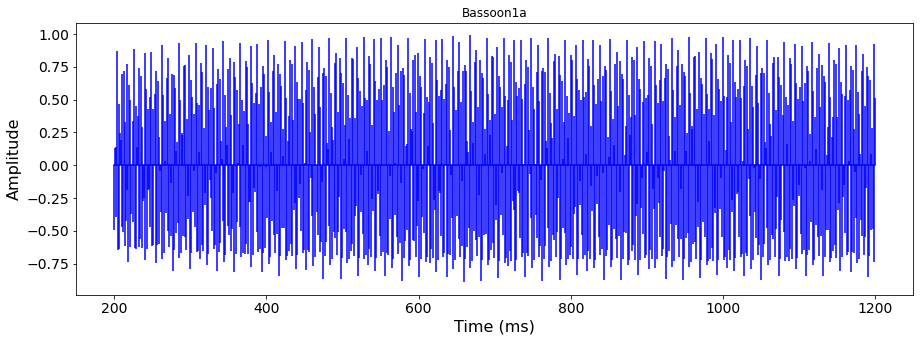

Bassoon2a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Bassoon2a : plotting PCM from 44100 to 88200
Bassoon2a : plotting PCM from 1000.0 ms to 2000.0 ms


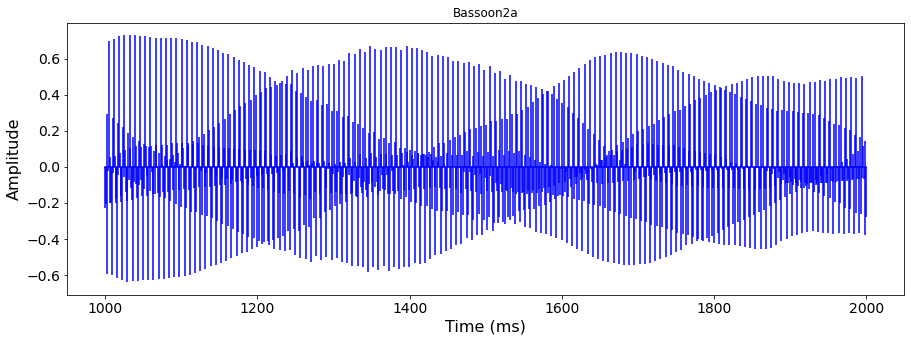

Bassoon3a_x : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Bassoon3a_x : plotting PCM from 88200 to 132300
Bassoon3a_x : plotting PCM from 2000.0 ms to 3000.0 ms


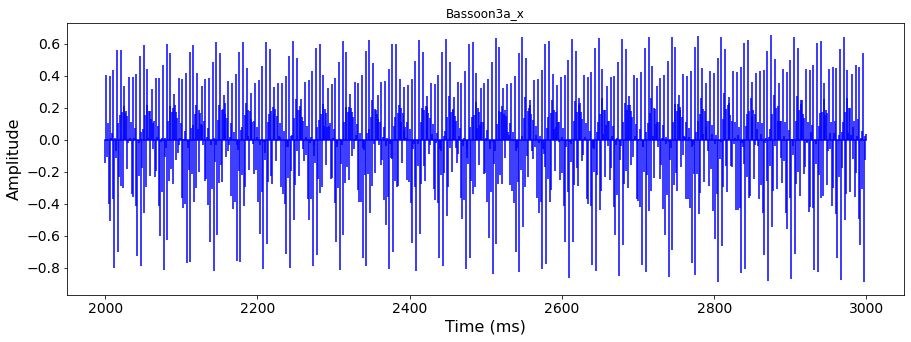

Viola1a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Viola1a : plotting PCM from 22050 to 66150
Viola1a : plotting PCM from 500.0 ms to 1500.0 ms


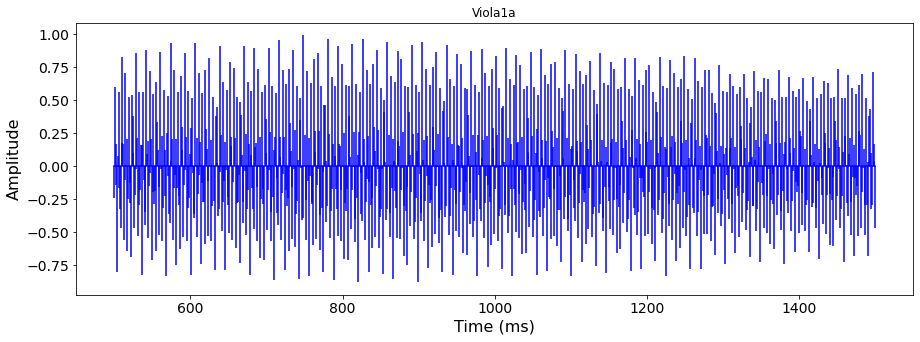

Viola2a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Viola2a : plotting PCM from 339570 to 383670
Viola2a : plotting PCM from 7700.0 ms to 8700.0 ms


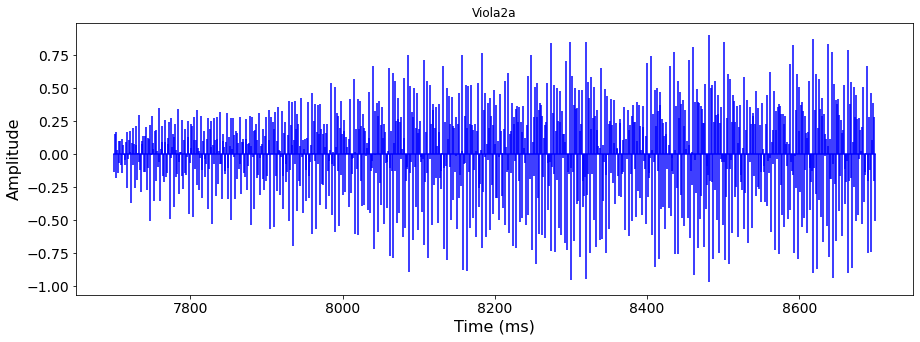

Viola3a_x : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 0.1
Viola3a_x : plotting PCM from 52920 to 57330
Viola3a_x : plotting PCM from 1200.0 ms to 1300.0 ms


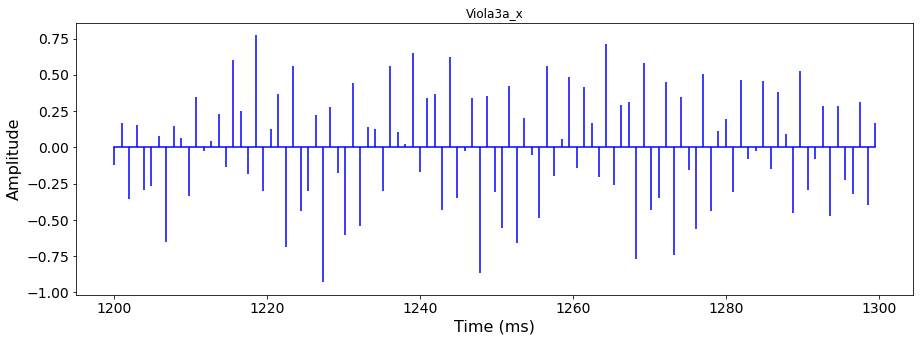

Cello1a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 2.0
Cello1a : plotting PCM from 302400 to 398400
Cello1a : plotting PCM from 6300.0 ms to 8300.0 ms


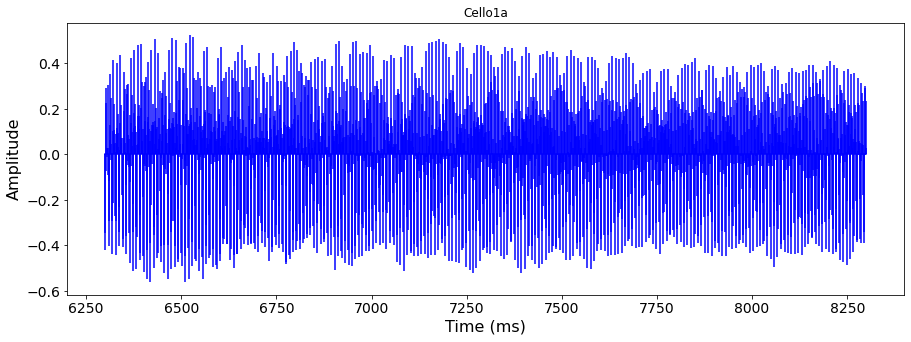

Cello2a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Cello2a : plotting PCM from 44100 to 88200
Cello2a : plotting PCM from 1000.0 ms to 2000.0 ms


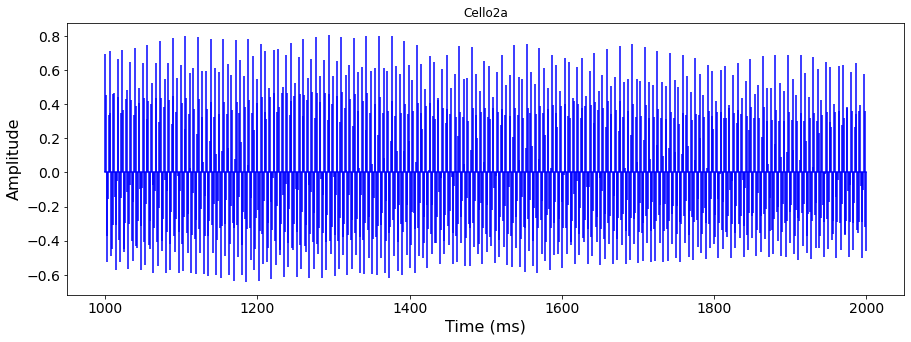

Cello3a_x : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Cello3a_x : plotting PCM from 30869 to 74969
Cello3a_x : plotting PCM from 700.0 ms to 1700.0 ms


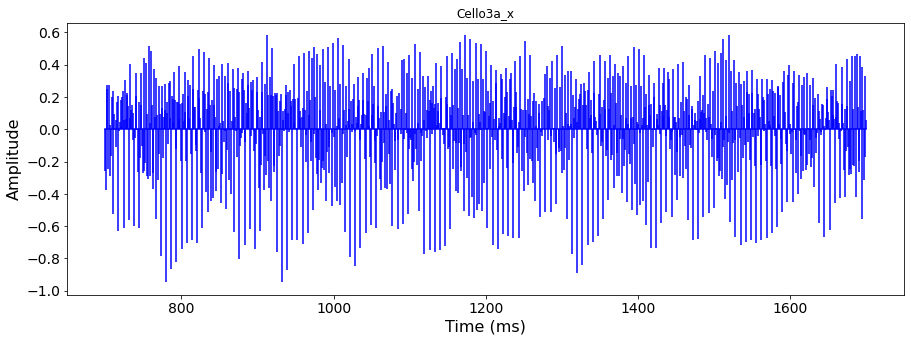

FrHorn1a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
FrHorn1a : plotting PCM from 8820 to 52920
FrHorn1a : plotting PCM from 200.0 ms to 1200.0 ms


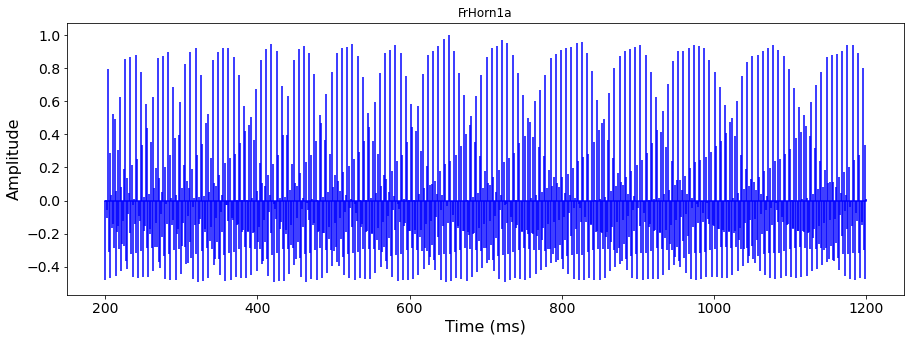

FrHorn2a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 2.0
FrHorn2a : plotting PCM from 44100 to 132300
FrHorn2a : plotting PCM from 1000.0 ms to 3000.0 ms


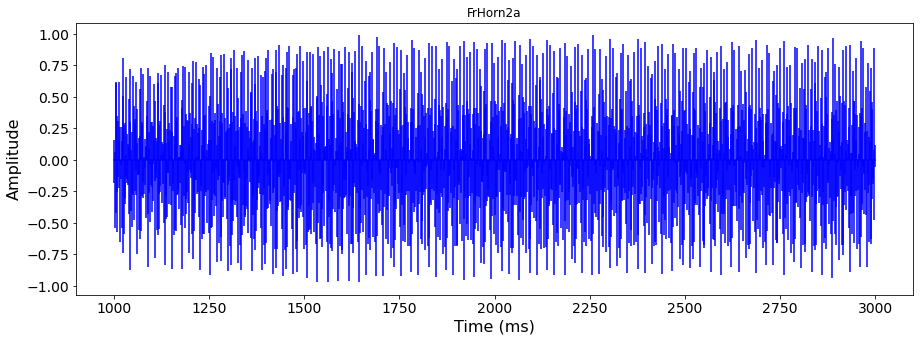

FrHorn3a_x : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
FrHorn3a_x : plotting PCM from 26460 to 70560
FrHorn3a_x : plotting PCM from 600.0 ms to 1600.0 ms


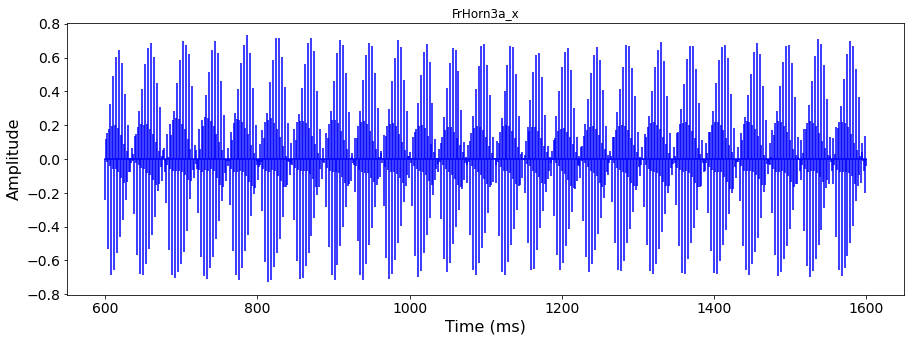

Flute1a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Flute1a : plotting PCM from 22050 to 66150
Flute1a : plotting PCM from 500.0 ms to 1500.0 ms


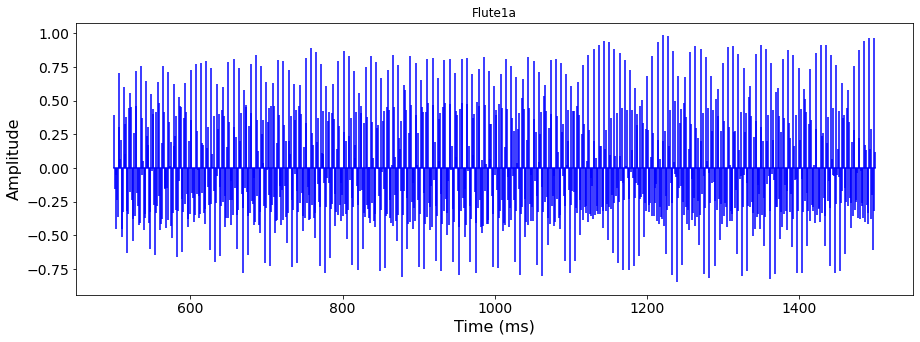

Flute2a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Flute2a : plotting PCM from 44100 to 88200
Flute2a : plotting PCM from 1000.0 ms to 2000.0 ms


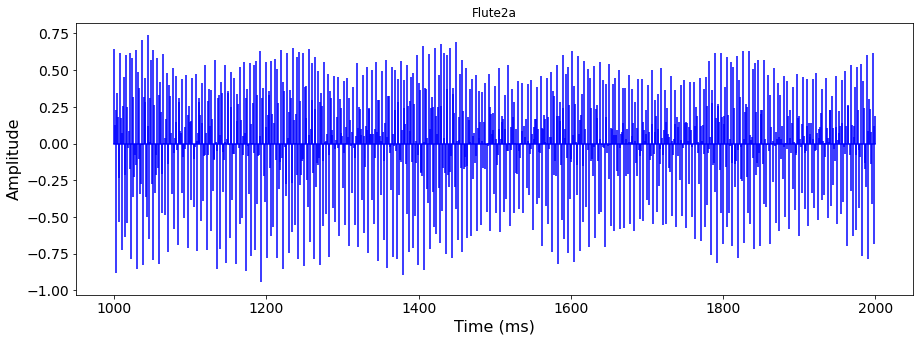

Flute3a_x : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Flute3a_x : plotting PCM from 44100 to 88200
Flute3a_x : plotting PCM from 1000.0 ms to 2000.0 ms


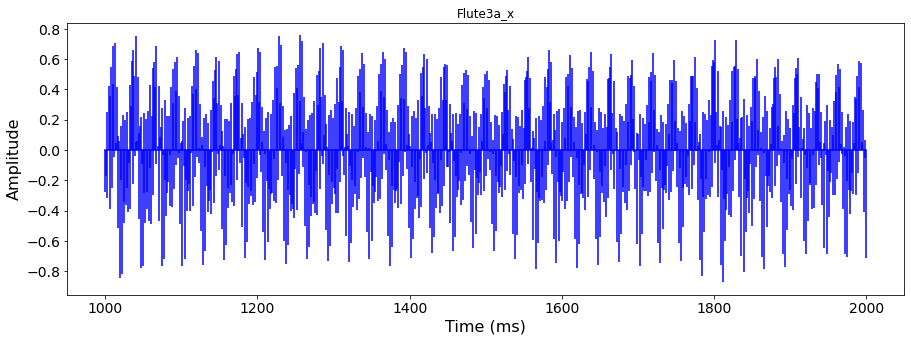

Clarinet1a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Clarinet1a : plotting PCM from 44100 to 88200
Clarinet1a : plotting PCM from 1000.0 ms to 2000.0 ms


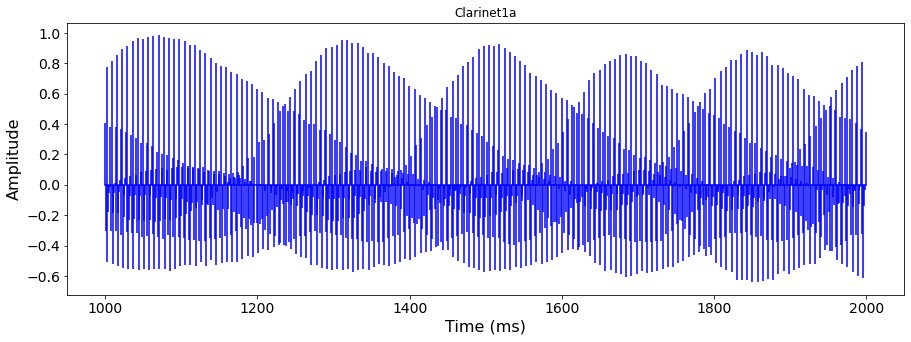

Clarinet2a : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 0.2
Clarinet2a : plotting PCM from 224909 to 233729
Clarinet2a : plotting PCM from 5100.0 ms to 5300.0 ms


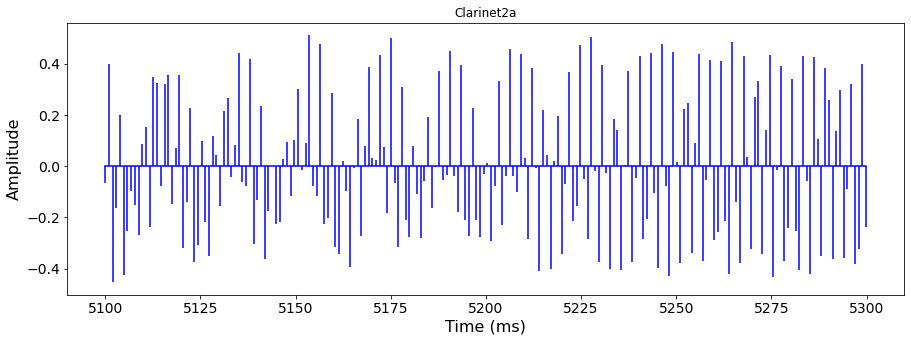

Clarinet3a_x : plotting PCM (plt.stem) subsamplingstep= 43 duration(s)= 1.0
Clarinet3a_x : plotting PCM from 145530 to 189630
Clarinet3a_x : plotting PCM from 3300.0 ms to 4300.0 ms


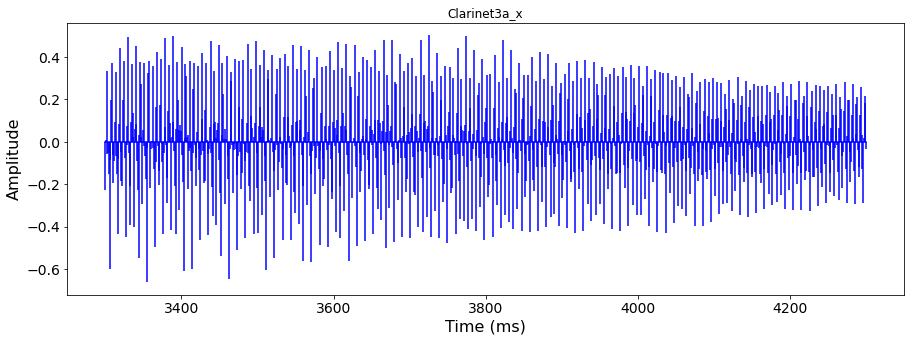

In [12]:
for i in range(len(objects)):
    objects[i].util_plot_pcm_window(subsamplingstep=43)

# comment
* the samples have been converted into real values and normalized
* the samples have been cut so as to contain a sustained instrument note without pauses

In [13]:
print('thank you.')

thank you.


# END OF ETL document